In [7]:
# Word cloud of tweets
import pandas as pd
import matplotlib.pyplot as plt 

tweets = pd.read_csv("Data/Tweets.csv")
tweets.info()

text_tweet=str(tweets['text'])
text_tweet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

"0                      @VirginAmerica What @dhepburn said.\n1        @VirginAmerica plus you've added commercials t...\n2        @VirginAmerica I didn't today... Must mean I n...\n3        @VirginAmerica it's really aggressive to blast...\n4        @VirginAmerica and it's a really big bad thing...\n                               ...                        \n14635    @AmericanAir thank you we got on a different f...\n14636    @AmericanAir leaving over 20 minutes Late Flig...\n14637    @AmericanAir Please bring American Airlines to...\n14638    @AmericanAir you have my money, you change my ...\n14639    @AmericanAir we have 8 ppl so we need 2 know h...\nName: text, Length: 14640, dtype: object"

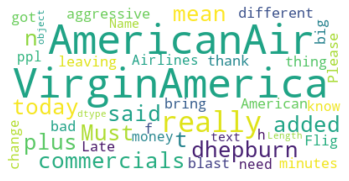

In [8]:

# Import the word cloud function 
from wordcloud import WordCloud, STOPWORDS 

# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white').generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

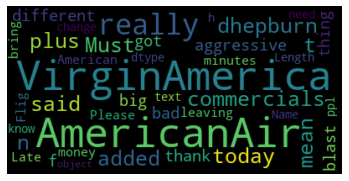

In [11]:

# Define and update the list of stopwords
my_stop_words = STOPWORDS.update(['airline', 'airplane', 'airlines'])

# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(text_tweet)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# final image
plt.show()

In [12]:
# More on Stopwords

#Pandas as Series
text_tweet1=(tweets['text']) 

# Import the stop words
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@'])

# Build and fit the vectorizer
vect = CountVectorizer(stop_words=my_stop_words)
vect.fit(text_tweet1)

# Create the bow representation
X_review = vect.transform(text_tweet1)
# Create the data frame
X_df = pd.DataFrame(X_review.toarray(), columns=vect.get_feature_names())
print(X_df.head())

   00  000  000114  000419  000ft  000lbs  0011  0016  00a  00am  ...  \
0   0    0       0       0      0       0     0     0    0     0  ...   
1   0    0       0       0      0       0     0     0    0     0  ...   
2   0    0       0       0      0       0     0     0    0     0  ...   
3   0    0       0       0      0       0     0     0    0     0  ...   
4   0    0       0       0      0       0     0     0    0     0  ...   

   zrh_airport  zsdgzydnde  zsuztnaijq  ztrdwv0n4l  zukes  zurich  zv2pt6trk9  \
0            0           0           0           0      0       0           0   
1            0           0           0           0      0       0           0   
2            0           0           0           0      0       0           0   
3            0           0           0           0      0       0           0   
4            0           0           0           0      0       0           0   

   zv6cfpohl5  zvfmxnuelj  zzps5ywve2  
0           0           0         

In [17]:
# notice that in this case the created features contain digits and other characters
# Multiple text columns, build BOW
# negative reason added as another text column
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
x = v.fit_transform(tweets['negativereason'].values.astype('U'))

In [23]:
# Define the stop words
my_stop_words = ENGLISH_STOP_WORDS.union(['airline', 'airlines', '@', 'am', 'pm'])
 
# Build and fit the vectorizers
vect1 = CountVectorizer(stop_words=my_stop_words) 
vect2 = CountVectorizer(stop_words=ENGLISH_STOP_WORDS) 
vect1.fit(text_tweet1)
vect2.fit(tweets['negativereason'])
vect2.fit(x)


# Print the last 15 features from the first, and all from second vectorizer
print(vect1.get_feature_names()[-15:])
print(vect2.get_feature_names())

ValueError: np.nan is an invalid document, expected byte or unicode string.